In [9]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

In [3]:
def residual_block(x, filters, downsample=False):
    identity = x
    stride = 2 if downsample else 1
    
    x = layers.Conv2D(filters, (3,3), strides=stride, padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    x = layers.Conv2D(filters, (3,3), strides=1, padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    
    if downsample:
        identity = layers.Conv2D(filters, (1,1), strides=2, padding='same', kernel_initializer='he_normal')(identity)
        identity = layers.BatchNormalization()(identity)
    
    x = layers.Add()([x, identity])
    x = layers.ReLU()(x)
    
    return x

In [4]:
def build_resnet_20(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(16, (3,3), strides=1, padding='same', kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    for filters in [16, 32, 64]:
        for i in range(3):  # n=3 for ResNet-20
            x = residual_block(x, filters, downsample=(i == 0 and filters != 16))
    
    x = layers.AveragePooling2D(pool_size=(8,8))(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs, outputs)
    return model


In [10]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

In [7]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

model = build_resnet_20((32, 32, 3), num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

model.save('resnet_cifar10.h5')

loss, acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy for CIFAR-10: {acc:.4f}')

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 74s 178ms/step - accuracy: 0.3925 - loss: 1.7199 - val_accuracy: 0.5434 - val_loss: 1.2881
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 68s 175ms/step - accuracy: 0.6381 - loss: 1.0091 - val_accuracy: 0.5872 - val_loss: 1.2157
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 68s 175ms/step - accuracy: 0.7078 - loss: 0.8190 - val_accuracy: 0.6377 - val_loss: 1.0196
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 67s 171ms/step - accuracy: 0.7560 - loss: 0.6919 - val_accuracy: 0.6657 - val_loss: 0.9737
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 68s 173ms/step - accuracy: 0.7926 - loss: 0.5897 - val_accuracy: 0.6495 - val_loss: 1.0854
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 70s 179ms/step - accuracy: 0.8220 - loss: 0.5050 - val_accuracy: 0.6941 - val_loss: 0.9519
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 69s 176ms/step - accuracy: 0.8451 - loss: 0.4370 - val_accuracy: 0.6583 - val_loss: 1.0215
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 184ms/step - accuracy: 0.8632 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7452 - loss: 1.1797
Test Accuracy for CIFAR-10: 0.7487


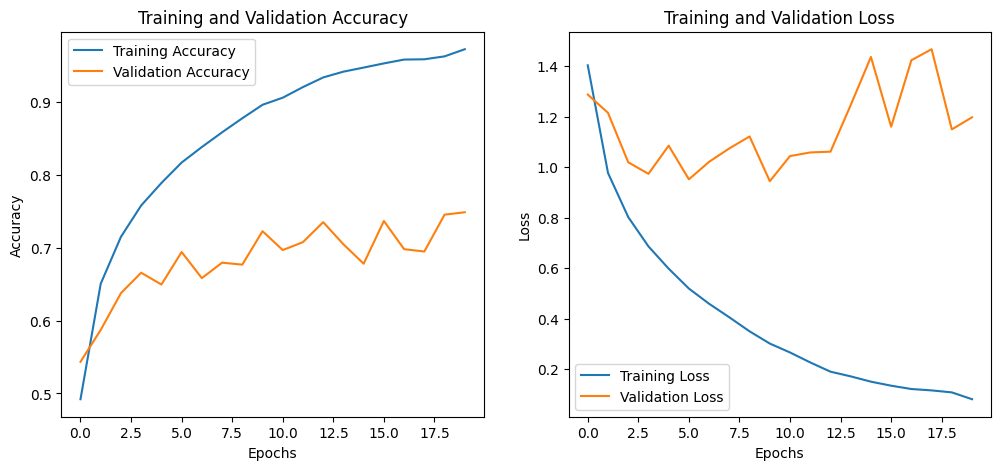

In [11]:
plot_training_history(history)

In [12]:
(x_train, y_train), (x_test, y_test) = datasets.cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
num_classes = 100

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

model = build_resnet_20((32, 32, 3), num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

model.save('resnet_cifar100.h5')

loss, acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy for CIFAR-100: {acc:.4f}')

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 73s 178ms/step - accuracy: 0.0675 - loss: 4.2161 - val_accuracy: 0.1215 - val_loss: 3.7043
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 68s 174ms/step - accuracy: 0.1895 - loss: 3.3175 - val_accuracy: 0.1782 - val_loss: 3.4382
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 68s 174ms/step - accuracy: 0.2685 - loss: 2.8966 - val_accuracy: 0.2181 - val_loss: 3.2215
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 67s 172ms/step - accuracy: 0.3257 - loss: 2.5946 - val_accuracy: 0.2880 - val_loss: 2.8232
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 167ms/step - accuracy: 0.3756 - loss: 2.3623 - val_accuracy: 0.3029 - val_loss: 2.7667
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 166ms/step - accuracy: 0.4151 - loss: 2.1796 - val_accuracy: 0.3460 - val_loss: 2.5148
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 166ms/step - accuracy: 0.4495 - loss: 2.0234 - val_accuracy: 0.3614 - val_loss: 2.4721
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 167ms/step - accuracy: 0.4730 - loss: 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4207 - loss: 2.5360
Test Accuracy for CIFAR-100: 0.4205


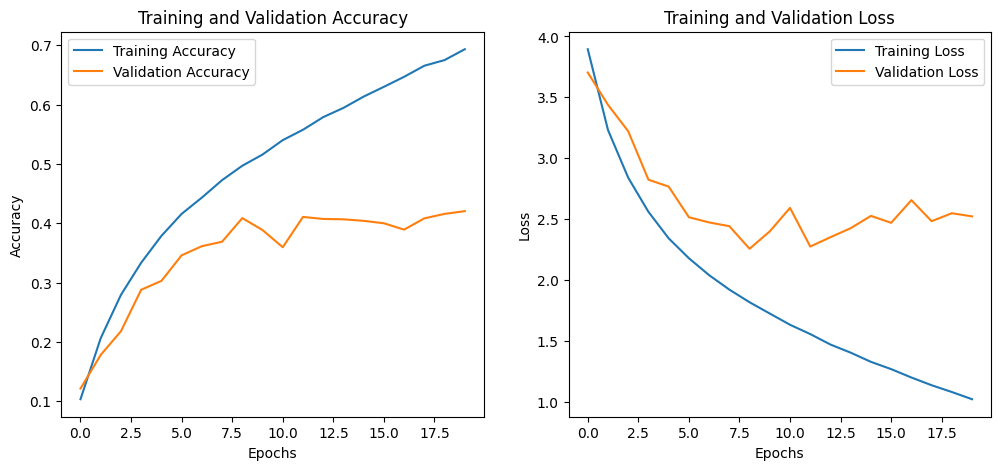

In [13]:
plot_training_history(history)